## First thing! Where's the doc??

https://wikimedia.org/api/rest_v1/



In [ ]:
# imports

import requests

import pandas as pd
# pd.options.display.max_columns = 200

import matplotlib.pyplot as plt


## Make the call and examine the results

In [ ]:
# endpoint + parameters

# where is our API + query?
url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kamala_Harris/daily/202011010/20201114'

# make the request and assign the result to a variable
req = requests.get(url)

# check we got the right response!
print(req)

# read our returned data using requests methods: requests.response.json()
response = req.json()

# see how many items in 'response'
len(response)

<Response [200]>


1

In [ ]:
# ok '1' doesn't tell us much. Let's look at the response

response

{'items': [{'access': 'all-access',
   'agent': 'all-agents',
   'article': 'Kamala_Harris',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2020110100',
   'views': 76291},
  {'access': 'all-access',
   'agent': 'all-agents',
   'article': 'Kamala_Harris',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2020110200',
   'views': 114128},
  {'access': 'all-access',
   'agent': 'all-agents',
   'article': 'Kamala_Harris',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2020110300',
   'views': 278684},
  {'access': 'all-access',
   'agent': 'all-agents',
   'article': 'Kamala_Harris',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2020110400',
   'views': 599350},
  {'access': 'all-access',
   'agent': 'all-agents',
   'article': 'Kamala_Harris',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2020110500',
   'views': 518753},
  {'access': 'all-access',
   'a

In [ ]:
len(response['items'])

14

In [ ]:
response['items'][3]

{'access': 'all-access',
 'agent': 'all-agents',
 'article': 'Kamala_Harris',
 'granularity': 'daily',
 'project': 'en.wikipedia',
 'timestamp': '2020110400',
 'views': 599350}

## assemble something from our results

In [ ]:
df = pd.DataFrame(response['items'])

# df = pd.DataFrame(response['items'][2:5])

In [ ]:
df

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Kamala_Harris,daily,2020110100,all-access,all-agents,76291
1,en.wikipedia,Kamala_Harris,daily,2020110200,all-access,all-agents,114128
2,en.wikipedia,Kamala_Harris,daily,2020110300,all-access,all-agents,278684
3,en.wikipedia,Kamala_Harris,daily,2020110400,all-access,all-agents,599350
4,en.wikipedia,Kamala_Harris,daily,2020110500,all-access,all-agents,518753
5,en.wikipedia,Kamala_Harris,daily,2020110600,all-access,all-agents,554841
6,en.wikipedia,Kamala_Harris,daily,2020110700,all-access,all-agents,3511954
7,en.wikipedia,Kamala_Harris,daily,2020110800,all-access,all-agents,6607162
8,en.wikipedia,Kamala_Harris,daily,2020110900,all-access,all-agents,1523504
9,en.wikipedia,Kamala_Harris,daily,2020111000,all-access,all-agents,618119


In [ ]:
# filter and print

for x in response['items']:
  print(x['timestamp'])
  print(x['views'])


2020110100
76291
2020110200
114128
2020110300
278684
2020110400
599350
2020110500
518753
2020110600
554841
2020110700
3511954
2020110800
6607162
2020110900
1523504
2020111000
618119
2020111100
332327
2020111200
222733
2020111300
175385
2020111400
158259


In [ ]:
#df_cols = ["timestamp", "views"]

# make an empty list
rows = []

# make a loop
for x in response['items']:

  # for this loop, define 'time' as ...
  time = x['timestamp']
  # for this loop, define 'view_count' as...
  view_count = x['views']

  # put each of these two items as values into a dictionary, and add the dictionary for this loop to the 'rows' list
  rows.append({"timestamp": time, "views": view_count})


In [ ]:
# what does our finished list look like?

rows

[{'timestamp': '2020110100', 'views': 76291},
 {'timestamp': '2020110200', 'views': 114128},
 {'timestamp': '2020110300', 'views': 278684},
 {'timestamp': '2020110400', 'views': 599350},
 {'timestamp': '2020110500', 'views': 518753},
 {'timestamp': '2020110600', 'views': 554841},
 {'timestamp': '2020110700', 'views': 3511954},
 {'timestamp': '2020110800', 'views': 6607162},
 {'timestamp': '2020110900', 'views': 1523504},
 {'timestamp': '2020111000', 'views': 618119},
 {'timestamp': '2020111100', 'views': 332327},
 {'timestamp': '2020111200', 'views': 222733},
 {'timestamp': '2020111300', 'views': 175385},
 {'timestamp': '2020111400', 'views': 158259}]

In [ ]:
df = pd.DataFrame(rows)
df[:3]

,timestamp,views
0,2020110100,76291
1,2020110200,114128
2,2020110300,278684


In [ ]:
df

,timestamp,views
0,2020110100,76291
1,2020110200,114128
2,2020110300,278684
3,2020110400,599350
4,2020110500,518753
5,2020110600,554841
6,2020110700,3511954
7,2020110800,6607162
8,2020110900,1523504
9,2020111000,618119


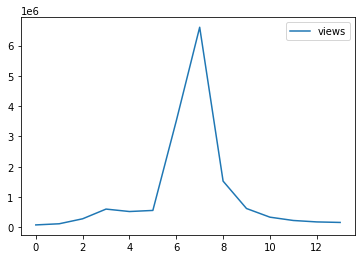

In [ ]:
# plot this data using pandas

df.plot()

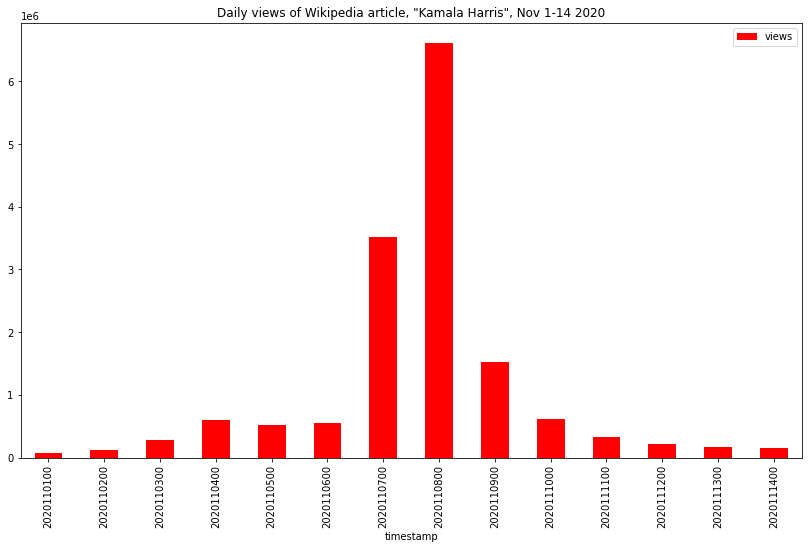

In [ ]:
# plot it using matplotlib

df.plot.bar(x = "timestamp", figsize = (14, 8), color = "red")
plt.title('Daily views of Wikipedia article, "Kamala Harris", Nov 1-14 2020')
plt.show()

## Extra 1: Using python syntax to write your query

In [ ]:
# using 'f-strings'

endpoint = 'https://wikimedia.org/api/rest_v1'

site = 'en.wikipedia'
article = 'Kamala_Harris'

method = 'metrics'
views = 'pageviews'
breakdown = 'per-article'

access = 'all-access'
agents = 'all-agents'

frequency = 'daily'
start_date = '202011010'
end_date = '20201114'

query = f'{endpoint}/{method}/{views}/{breakdown}/{site}/{access}/{agents}/{article}/{frequency}/{start_date}/{end_date}'

# usually we wouldn't print this - although it's very helpful for investigating if your query is put together properly
print(query)

# requests.get(query)

https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Kamala_Harris/daily/202011010/20201114


## Extra 2: Put all the querying into a single function (that take an argument for the 'country' (i.e. language)

In [21]:

def country_vp(country, start):
    
    # values for API query
    endpoint = 'https://wikimedia.org/api/rest_v1'
    site = f'{country}.wikipedia'
    article = 'Kamala_Harris'
    method = 'metrics'
    views = 'pageviews'
    breakdown = 'per-article'
    access = 'all-access'
    agents = 'all-agents'
    frequency = 'daily'
    start_date = f'{start}'
    end_date = '20201114'
    
    # send the query
    url = f'{endpoint}/{method}/{views}/{breakdown}/{site}/{access}/{agents}/{article}/{frequency}/{start_date}/{end_date}'
    req = requests.get(url)
    items = req.json()['items']

    # loop through the returned JSON
    df_cols = ["timestamp", "views"]
    days= []
    for x in items:
        time = x['timestamp']
        view_count = x['views']
        days.append({"timestamp": time, "views": view_count})
    
    # build df from list of days and plot the days
    df = pd.DataFrame(days)
    df.plot.bar(x = "timestamp", figsize = (14, 8), color = "green")
    plt.title(f'Daily views of Wikipedia article, "Kamala Harris", Nov 1-14 2020, {country}')
    plt.show()
    

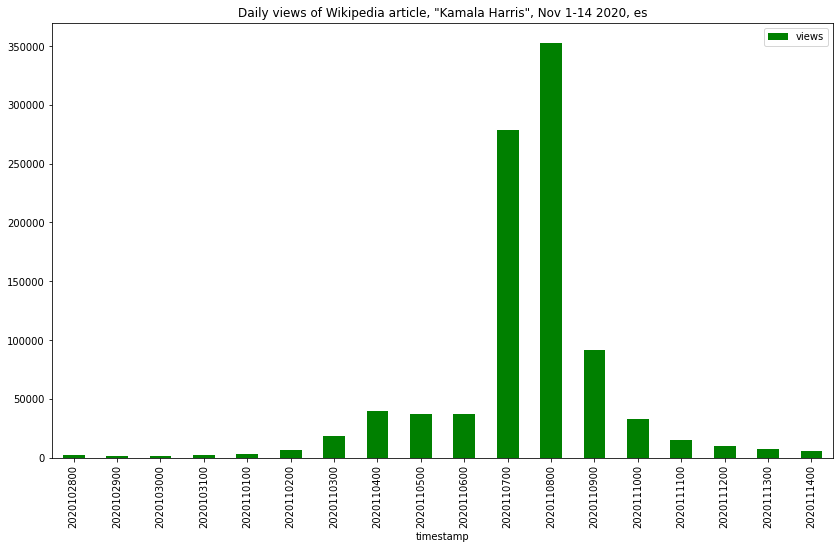

In [24]:
# Use your function - although you need to know the codes for the countries / languages
# cy, de, it, zh, fr, ga, es, la, simple, so

country_vp('es', '20201028')